In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

from collections import Counter
import spacy
nlp = spacy.load('en')

In [2]:
#https://towardsdatascience.com/machine-learning-for-text-classification-using-spacy-in-python-b276b4051a49

In [3]:
# https://towardsdatascience.com/machine-learning-for-text-classification-using-spacy-in-python-b276b4051a49

In [4]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  BBC, CNN, FOXNEWS, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER ]


NAME_POLITICIAN = "politician"
NAME_NEWSAGENCY = "news agency"
NAME_SPORTSTAR = "sports star"

NAME_CLUSTER_0  = "C0_Fan_Page"
NAME_CLUSTER_1 = "C1_Ordinary_User"
NAME_CLUSTER_2 = "C2_Botlike"

LIST_CLUSTERS = ['C0_Fan_Page', 'C1_Ordinary_User', 'C2_Botlike' ]

LIST_CATEGORIES = ['Politician', 'News agency', 'Sports star' ]

LIST_PLOT_PATTERN = ['///', 'O', '\\\ ', '//\\',
                    '', '', '', '',
                    '==', 'oo', '0//', '////']


# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# define colors

COLOR_POLITICIAN = '#3e80f0'
COLOR_NEWSAGENCY = '#32a840'
COLOR_SPORTSARTS = '#f56d25'


COLOR_C0 = '#446fc4'
COLOR_C1 = '#7f2d9b'
COLOR_C2 = '#369b4f'


COLORS_COMMUNITIES = [ COLOR_POLITICIAN,
              COLOR_NEWSAGENCY,
              COLOR_SPORTSARTS
                 ]

COLORS_CLUSTERS = [ COLOR_C0,
              COLOR_C1,
              COLOR_C2
                 ]

# Load Clustered Data

In [6]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


In [7]:
df_c0_comment_trump = pd.read_csv('DataFrames/df_c0_comment_trump.csv')
df_c0_comment_obama = pd.read_csv('DataFrames/df_c0_comment_obama.csv')
df_c0_comment_macron = pd.read_csv('DataFrames/df_c0_comment_macron.csv')
df_c0_comment_may = pd.read_csv('DataFrames/df_c0_comment_may.csv')

df_c0_comment_bbc = pd.read_csv('DataFrames/df_c0_comment_bbc.csv')
df_c0_comment_cnn = pd.read_csv('DataFrames/df_c0_comment_cnn.csv')
df_c0_comment_foxnews = pd.read_csv('DataFrames/df_c0_comment_foxnews.csv')
df_c0_comment_reuters = pd.read_csv('DataFrames/df_c0_comment_reuters.csv')

df_c0_comment_messi = pd.read_csv('DataFrames/df_c0_comment_messi.csv')
df_c0_comment_ronaldo = pd.read_csv('DataFrames/df_c0_comment_ronaldo.csv')
df_c0_comment_nadal = pd.read_csv('DataFrames/df_c0_comment_nadal.csv')
df_c0_comment_federer = pd.read_csv('DataFrames/df_c0_comment_federer.csv')


df_c0_like_trump = pd.read_csv('DataFrames/df_c0_like_trump.csv')
df_c0_like_obama = pd.read_csv('DataFrames/df_c0_like_obama.csv')
df_c0_like_macron = pd.read_csv('DataFrames/df_c0_like_macron.csv')
df_c0_like_may = pd.read_csv('DataFrames/df_c0_like_may.csv')

df_c0_like_bbc = pd.read_csv('DataFrames/df_c0_like_bbc.csv')
df_c0_like_cnn = pd.read_csv('DataFrames/df_c0_like_cnn.csv')
df_c0_like_foxnews = pd.read_csv('DataFrames/df_c0_like_foxnews.csv')
df_c0_like_reuters = pd.read_csv('DataFrames/df_c0_like_reuters.csv')

df_c0_like_messi = pd.read_csv('DataFrames/df_c0_like_messi.csv')
df_c0_like_ronaldo = pd.read_csv('DataFrames/df_c0_like_ronaldo.csv')
df_c0_like_nadal = pd.read_csv('DataFrames/df_c0_like_nadal.csv')
df_c0_like_federer = pd.read_csv('DataFrames/df_c0_like_federer.csv')

In [8]:
df_c1_comment_trump = pd.read_csv('DataFrames/df_c1_comment_trump.csv')
df_c1_comment_obama = pd.read_csv('DataFrames/df_c1_comment_obama.csv')
df_c1_comment_macron = pd.read_csv('DataFrames/df_c1_comment_macron.csv')
df_c1_comment_may = pd.read_csv('DataFrames/df_c1_comment_may.csv')

df_c1_comment_bbc = pd.read_csv('DataFrames/df_c1_comment_bbc.csv')
df_c1_comment_cnn = pd.read_csv('DataFrames/df_c1_comment_cnn.csv')
df_c1_comment_foxnews = pd.read_csv('DataFrames/df_c1_comment_foxnews.csv')
df_c1_comment_reuters = pd.read_csv('DataFrames/df_c1_comment_reuters.csv')

df_c1_comment_messi = pd.read_csv('DataFrames/df_c1_comment_messi.csv')
df_c1_comment_ronaldo = pd.read_csv('DataFrames/df_c1_comment_ronaldo.csv')
df_c1_comment_nadal = pd.read_csv('DataFrames/df_c1_comment_nadal.csv')
df_c1_comment_federer = pd.read_csv('DataFrames/df_c1_comment_federer.csv')


df_c1_like_trump = pd.read_csv('DataFrames/df_c1_like_trump.csv')
df_c1_like_obama = pd.read_csv('DataFrames/df_c1_like_obama.csv')
df_c1_like_macron = pd.read_csv('DataFrames/df_c1_like_macron.csv')
df_c1_like_may = pd.read_csv('DataFrames/df_c1_like_may.csv')

df_c1_like_bbc = pd.read_csv('DataFrames/df_c1_like_bbc.csv')
df_c1_like_cnn = pd.read_csv('DataFrames/df_c1_like_cnn.csv')
df_c1_like_foxnews = pd.read_csv('DataFrames/df_c1_like_foxnews.csv')
df_c1_like_reuters = pd.read_csv('DataFrames/df_c1_like_reuters.csv')

df_c1_like_messi = pd.read_csv('DataFrames/df_c1_like_messi.csv')
df_c1_like_ronaldo = pd.read_csv('DataFrames/df_c1_like_ronaldo.csv')
df_c1_like_nadal = pd.read_csv('DataFrames/df_c1_like_nadal.csv')
df_c1_like_federer = pd.read_csv('DataFrames/df_c1_like_federer.csv')

In [9]:
df_c2_comment_trump = pd.read_csv('DataFrames/df_c2_comment_trump.csv')
df_c2_comment_obama = pd.read_csv('DataFrames/df_c2_comment_obama.csv')
df_c2_comment_macron = pd.read_csv('DataFrames/df_c2_comment_macron.csv')
df_c2_comment_may = pd.read_csv('DataFrames/df_c2_comment_may.csv')

df_c2_comment_bbc = pd.read_csv('DataFrames/df_c2_comment_bbc.csv')
df_c2_comment_cnn = pd.read_csv('DataFrames/df_c2_comment_cnn.csv')
df_c2_comment_foxnews = pd.read_csv('DataFrames/df_c2_comment_foxnews.csv')
df_c2_comment_reuters = pd.read_csv('DataFrames/df_c2_comment_reuters.csv')

df_c2_comment_messi = pd.read_csv('DataFrames/df_c2_comment_messi.csv')
df_c2_comment_ronaldo = pd.read_csv('DataFrames/df_c2_comment_ronaldo.csv')
df_c2_comment_nadal = pd.read_csv('DataFrames/df_c2_comment_nadal.csv')
df_c2_comment_federer = pd.read_csv('DataFrames/df_c2_comment_federer.csv')


df_c2_like_trump = pd.read_csv('DataFrames/df_c2_like_trump.csv')
df_c2_like_obama = pd.read_csv('DataFrames/df_c2_like_obama.csv')
df_c2_like_macron = pd.read_csv('DataFrames/df_c2_like_macron.csv')
df_c2_like_may = pd.read_csv('DataFrames/df_c2_like_may.csv')

df_c2_like_bbc = pd.read_csv('DataFrames/df_c2_like_bbc.csv')
df_c2_like_cnn = pd.read_csv('DataFrames/df_c2_like_cnn.csv')
df_c2_like_foxnews = pd.read_csv('DataFrames/df_c2_like_foxnews.csv')
df_c2_like_reuters = pd.read_csv('DataFrames/df_c2_like_reuters.csv')

df_c2_like_messi = pd.read_csv('DataFrames/df_c2_like_messi.csv')
df_c2_like_ronaldo = pd.read_csv('DataFrames/df_c2_like_ronaldo.csv')
df_c2_like_nadal = pd.read_csv('DataFrames/df_c2_like_nadal.csv')
df_c2_like_federer = pd.read_csv('DataFrames/df_c2_like_federer.csv')

# Dataframe like+comment each case

In [10]:
# df of both comment and like in each usecase - c2

#politicians
df_c2_both_trump = pd.concat([df_c2_comment_trump, df_c2_like_trump])
df_c2_both_obama = pd.concat([df_c2_comment_obama, df_c2_like_obama])
df_c2_both_macron = pd.concat([df_c2_comment_macron, df_c2_like_macron])
df_c2_both_may = pd.concat([df_c2_comment_may, df_c2_like_may])

#News agencies
df_c2_both_bbc = pd.concat([df_c2_comment_bbc, df_c2_like_bbc])
df_c2_both_cnn = pd.concat([df_c2_comment_cnn, df_c2_like_cnn])
df_c2_both_foxnews = pd.concat([df_c2_comment_foxnews, df_c2_like_foxnews])
df_c2_both_reuters = pd.concat([df_c2_comment_reuters, df_c2_like_reuters])

#Sports star
df_c2_both_messi = pd.concat([df_c2_comment_messi, df_c2_like_messi])
df_c2_both_ronaldo = pd.concat([df_c2_comment_ronaldo, df_c2_like_ronaldo])
df_c2_both_nadal = pd.concat([df_c2_comment_nadal, df_c2_like_nadal])
df_c2_both_federer = pd.concat([df_c2_comment_federer, df_c2_like_federer])

# Dataframe comment - per use case

In [11]:
#df of all comments per usecase
df_comment_trump = pd.concat([df_c0_comment_trump, df_c1_comment_trump, df_c2_comment_trump])
df_comment_obama = pd.concat([df_c0_comment_obama, df_c1_comment_obama, df_c2_comment_obama])
df_comment_macron = pd.concat([df_c0_comment_macron, df_c1_comment_macron, df_c2_comment_macron])
df_comment_may = pd.concat([df_c0_comment_may, df_c1_comment_may, df_c2_comment_may])

df_comment_bbc = pd.concat([df_c0_comment_bbc, df_c1_comment_bbc, df_c2_comment_bbc])
df_comment_cnn = pd.concat([df_c0_comment_cnn, df_c1_comment_cnn, df_c2_comment_cnn])
df_comment_foxnews = pd.concat([df_c0_comment_foxnews, df_c1_comment_foxnews, df_c2_comment_foxnews])
df_comment_reuters = pd.concat([df_c0_comment_reuters, df_c1_comment_reuters, df_c2_comment_reuters])

df_comment_messi = pd.concat([df_c0_comment_messi, df_c1_comment_messi, df_c2_comment_messi])
df_comment_ronaldo = pd.concat([df_c0_comment_ronaldo, df_c1_comment_ronaldo, df_c2_comment_ronaldo])
df_comment_nadal = pd.concat([df_c0_comment_nadal, df_c1_comment_nadal, df_c2_comment_nadal])
df_comment_federer = pd.concat([df_c0_comment_federer, df_c1_comment_federer, df_c2_comment_federer])

# Dataframe like - per use case

In [12]:
#df of all likes per usecase
df_like_trump = pd.concat([df_c0_like_trump, df_c1_like_trump, df_c2_like_trump])
df_like_obama = pd.concat([df_c0_like_obama, df_c1_like_obama, df_c2_like_obama])
df_like_macron = pd.concat([df_c0_like_macron, df_c1_like_macron, df_c2_like_macron])
df_like_may = pd.concat([df_c0_like_may, df_c1_like_may, df_c2_like_may])

df_like_bbc = pd.concat([df_c0_like_bbc, df_c1_like_bbc, df_c2_like_bbc])
df_like_cnn = pd.concat([df_c0_like_cnn, df_c1_like_cnn, df_c2_like_cnn])
df_like_foxnews = pd.concat([df_c0_like_foxnews, df_c1_like_foxnews, df_c2_like_foxnews])
df_like_reuters = pd.concat([df_c0_like_reuters, df_c1_like_reuters, df_c2_like_reuters])

df_like_messi = pd.concat([df_c0_like_messi, df_c1_like_messi, df_c2_like_messi])
df_like_ronaldo = pd.concat([df_c0_like_ronaldo, df_c1_like_ronaldo, df_c2_like_ronaldo])
df_like_nadal = pd.concat([df_c0_like_nadal, df_c1_like_nadal, df_c2_like_nadal])
df_like_federer = pd.concat([df_c0_like_federer, df_c1_like_federer, df_c2_like_federer])

# Dataframe comment - per category

In [13]:
#df of all comments per usecase
df_comment_politician = pd.concat([df_comment_trump, df_comment_obama, df_comment_macron, df_comment_may])
df_comment_politician['community'] = NAME_POLITICIAN

df_comment_newsagency = pd.concat([df_comment_bbc, df_comment_cnn, df_comment_foxnews, df_comment_reuters])
df_comment_newsagency['community'] = NAME_NEWSAGENCY

df_comment_sportstar = pd.concat([df_comment_messi, df_comment_ronaldo, df_comment_nadal, df_comment_federer])
df_comment_sportstar['community'] = NAME_SPORTSTAR

# Dataframe like - per category

In [14]:
#df of all comments per usecase
df_like_politician = pd.concat([df_like_trump, df_like_obama, df_like_macron, df_like_may])

df_like_newsagency = pd.concat([df_like_bbc, df_like_cnn, df_like_foxnews, df_like_reuters])

df_like_sportstar = pd.concat([df_like_messi, df_like_ronaldo, df_like_nadal, df_like_federer])

In [15]:
df_c0_comment_politician = pd.concat([df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may])
df_c0_comment_politician['community'] = NAME_POLITICIAN
df_c0_comment_newsagency = pd.concat([df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters])
df_c0_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c0_comment_sportstar = pd.concat([df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer])
df_c0_comment_sportstar['community'] = NAME_SPORTSTAR


df_c1_comment_politician = pd.concat([df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may])
df_c1_comment_politician['community'] = NAME_POLITICIAN
df_c1_comment_newsagency = pd.concat([df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters])
df_c1_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c1_comment_sportstar = pd.concat([df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer])
df_c1_comment_sportstar['community'] = NAME_SPORTSTAR

df_c2_comment_politician = pd.concat([df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may])
df_c2_comment_politician['community'] = NAME_POLITICIAN
df_c2_comment_newsagency = pd.concat([df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters])
df_c2_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c2_comment_sportstar = pd.concat([df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer])
df_c2_comment_sportstar['community'] = NAME_SPORTSTAR

# Dataframe comment - per cluster

In [16]:
# df all comment

df_c0_comments = pd.concat([df_c0_comment_politician, df_c0_comment_newsagency, df_c0_comment_sportstar])
df_c0_comments['cluster'] = NAME_CLUSTER_0

df_c1_comments = pd.concat([df_c1_comment_politician, df_c1_comment_newsagency, df_c1_comment_sportstar ])
df_c1_comments['cluster'] = NAME_CLUSTER_1

df_c2_comments = pd.concat([df_c2_comment_politician, df_c2_comment_newsagency, df_c2_comment_sportstar ])
df_c2_comments['cluster'] = NAME_CLUSTER_2



df_c0_like = pd.concat([df_c0_like_trump, df_c0_like_obama, df_c0_like_macron, df_c0_like_may,
                           df_c0_like_bbc, df_c0_like_cnn, df_c0_like_foxnews, df_c0_like_reuters,
                            df_c0_like_messi, df_c0_like_ronaldo, df_c0_like_nadal, df_c0_like_federer,
                           ])


df_c1_like = pd.concat([df_c1_like_trump, df_c1_like_obama, df_c1_like_macron, df_c1_like_may,
                           df_c1_like_bbc, df_c1_like_cnn, df_c1_like_foxnews, df_c1_like_reuters,
                            df_c1_like_messi, df_c1_like_ronaldo, df_c1_like_nadal, df_c1_like_federer,
                           ])


df_c2_like = pd.concat([df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may,
                           df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters,
                            df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer,
                           ])




print("cluster 0-fan: " + str(df_c0_comments.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_comments.shape[0]))
print("cluster 2-botlike: " + str(df_c2_comments.shape[0]))
print("----")
print("cluster 0-fan: " + str(df_c0_like.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_like.shape[0]))
print("cluster 2-botlike: " + str(df_c2_like.shape[0]))

cluster 0-fan: 2519
cluster 1-ordinary: 2087
cluster 2-botlike: 213
----
cluster 0-fan: 1317
cluster 1-ordinary: 775
cluster 2-botlike: 506


# Dataframe all - comment

In [17]:
df_comments = pd.concat([df_c0_comments, df_c1_comments, df_c2_comments])
print(df_comments.shape[0])

df_likes = pd.concat([df_c0_like, df_c1_like, df_c2_like])
print(df_likes.shape[0])

4819
2598


In [18]:
df_all = pd.concat([df_comments, df_likes])

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Stats

In [19]:
print(df_c0_comments.shape[0] * 100 / df_comments.shape[0])
print(df_c1_comments.shape[0] * 100 / df_comments.shape[0])
print(df_c2_comments.shape[0] * 100 / df_comments.shape[0])
print("=======")
print(df_c0_like.shape[0] * 100 / df_likes.shape[0])
print(df_c1_like.shape[0] * 100 / df_likes.shape[0])
print(df_c2_like.shape[0] * 100 / df_likes.shape[0])

52.272255654700146
43.307740195061214
4.420004150238639
50.69284064665127
29.8306389530408
19.47652040030793


In [20]:
df_c0 = pd.concat([df_c0_comments, df_c0_like])
df_c1 = pd.concat([df_c1_comments, df_c1_like])
df_c2 = pd.concat([df_c2_comments, df_c2_like])

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False

In [21]:
print(df_c0.groupby('owener_id').ngroups)
print(df_c1.groupby('owener_id').ngroups)
print(df_c2.groupby('owener_id').ngroups)
print("====")
print(df_c0.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)
print(df_c1.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)
print(df_c2.groupby('owener_id').ngroups * 100 / df_all.groupby('owener_id').ngroups)

2101
1334
391
====
54.913748039728176
34.86670151594355
10.21955044432828


# Machine Learning

In [22]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [23]:
df_comments.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'username', 'name', 'bio', 'photo',
       'nfollower', 'nfollowee', 'nmediacount', 'follower', 'followee',
       'mediacount', 'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class',
       'class BGM 3', 'class GM 3', 'class kmeans 3', 'class spectral 3',
       'class GM 4', 'owener_id', 'combined_owener_external_url',
       'combined_username', 'combined_full_name', 'combined_profile_pic_url',
       'combined_biography', 'combined_similarity_photo_comment',
       'combined_similarity_photo_like', 'comment_created_at', 'comment_id',
       'comment_post_shortcode', 'comment_shortcode_username', 'comment_text',
       'comment_total', 'like_total', 'like_shortcode_username',
       'like_post_shortcode', 'like_id', 'comment_post_date',
       'comment_avg_age_sec', 'comment_age_sec', 'community', 'cluster'],
      dtype='object')

In [24]:
def clean_text_df(_row):
    
    # Load the regular expression library
#     import re
    
    text = _row['comment_text']
    
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('\S*@\S*\s?', '', text)  # remove emails
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", "", text)  # remove single quotes

    #emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    text = re.sub('[,\.!?]', '', text)

    # Convert the titles to lowercase
    text = text.lower()

    _row['comment_text_clean'] = text
        
    return _row

df_comments = df_comments.apply(clean_text_df, axis=1)

In [25]:
df_comments = df_comments[df_comments['comment_text_clean'] != ""]

In [26]:
df = df_comments[['comment_text_clean', 'cluster']]
df.shape

(2836, 2)

In [27]:
df.isnull().sum()

comment_text_clean    0
cluster               0
dtype: int64

In [28]:
df['cluster'].nunique()

3

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=42)

In [30]:
print('Research title sample:', train['comment_text_clean'].iloc[0])
print('Conference of this paper:', train['cluster'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Research title sample: the king 
Conference of this paper: C1_Ordinary_User
Training Data Shape: (1900, 2)
Testing Data Shape: (936, 2)


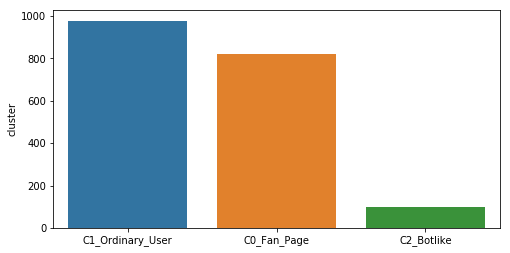

In [31]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['cluster'].unique(), y=train['cluster'].value_counts())
plt.show()

In [32]:
import spacy

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [33]:
C0_text = [text for text in train[train['cluster'] == NAME_CLUSTER_0]['comment_text_clean']]
C1_text = [text for text in train[train['cluster'] == NAME_CLUSTER_1]['comment_text_clean']]

C0_clean = cleanup_text(C0_text)
C0_clean = ' '.join(C0_clean).split()

C1_clean = cleanup_text(C1_text)
C1_clean = ' '.join(C1_clean).split()

C0_counts = Counter(C0_clean)
C1_counts = Counter(C1_clean)

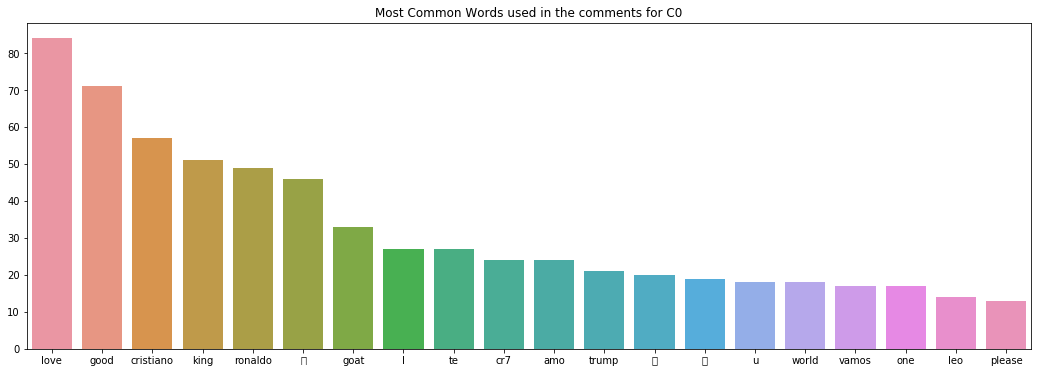

In [34]:
C0_common_words = [word[0] for word in C0_counts.most_common(20)]
C0_common_counts = [word[1] for word in C0_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=C0_common_words, y=C0_common_counts)
plt.title('Most Common Words used in the comments for C0')
plt.show()

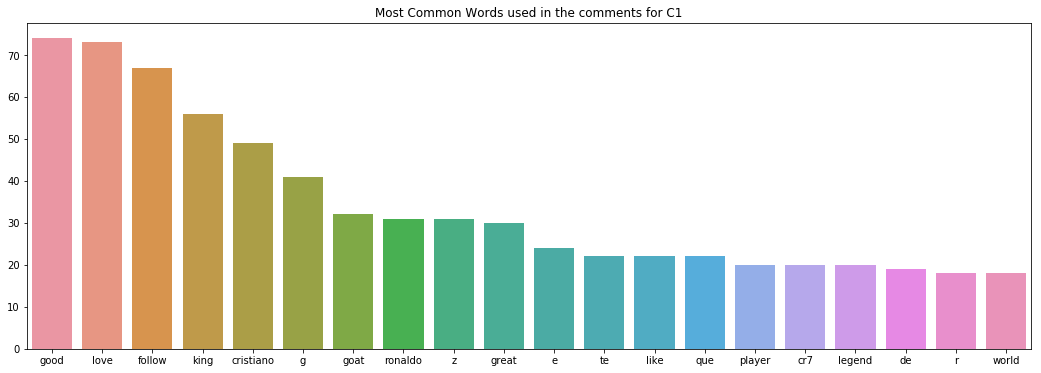

In [35]:
C1_common_words = [word[0] for word in C1_counts.most_common(20)]
C1_common_counts = [word[1] for word in C1_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=C1_common_words, y=C1_common_counts)
plt.title('Most Common Words used in the comments for C1')
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

In [37]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

In [38]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    
    #emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('\S*@\S*\s?', '', text)  # remove emails
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", "", text)  # remove single quotes
    
    # Remove punctuation
    text = re.sub('[,\.!?]', '', text)
    
    

#     text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text



def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [39]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

# data
train1 = train['comment_text_clean'].tolist()
labelsTrain1 = train['cluster'].tolist()

test1 = test['comment_text_clean'].tolist()
labelsTest1 = test['cluster'].tolist()
# train
pipe.fit(train1, labelsTrain1)

# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()

for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.5854700854700855
Top 10 features used to predict: 
Class 1 best: 
(-1.2671103015737917, 'followe')
(-1.2062519903994653, 'r')
(-1.2027817907700578, 'goodluc')
(-1.1471983158290868, 'strong')
(-1.1091596661838672, 'thousand')
(-1.0708137530784436, 'b')
(-1.0708136393319885, 'siiiiiiiiiiimmmm')
(-1.0536289707560698, 'سيرو')
(-1.0499615283403294, 'heart')
(-1.0311538740287274, 'gt')
Class 2 best: 
(1.5087403583582786, '→')
(1.382700425855338, 'rest')
(1.3656244200683123, 'l')
(1.279589645930392, '’s')
(1.1619663733036283, 'champ')
(1.1364096910000336, 'bangladesh')
(1.0977596909347704, 'india')
(1.0977223907126386, 'ıng')
(1.094480979248708, 'federer')
(1.0909512243128865, 'yes')


In [40]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds, 
                                    target_names=df['cluster'].unique()))

                  precision    recall  f1-score   support

     C0_Fan_Page       0.61      0.72      0.66       493
C1_Ordinary_User       0.54      0.44      0.49       398
      C2_Botlike       0.61      0.38      0.47        45

       micro avg       0.59      0.59      0.59       936
       macro avg       0.59      0.51      0.54       936
    weighted avg       0.58      0.59      0.58       936

